## Day 35 Lecture 1 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset describing survival rates after breast cancer surgery loaded below and analyze the model generated for this dataset.

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import ds_useful as ds

In [9]:
# Attributes:
# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
#  -- 1 = the patient survived 5 years or longer
#  -- 2 = the patient died within 5 year

cols = ['age', 'op_year', 'nodes', 'survival']
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/haberman.data', names=cols)

In [10]:
cancer.head()

,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


Check for missing data and remove all rows containing missing data

In [11]:
# answer below:

ds.missingness_summary(cancer)

survival    0.0
nodes       0.0
op_year     0.0
age         0.0
dtype: float64

Adjust the target variable so that it has values of either 0 or 1

In [12]:
# answer below:

cancer['survival'] = cancer['survival'] - 1
cancer['survival'].value_counts()

0    225
1     81
Name: survival, dtype: int64

Create a dummy variable from the number of nodes

In [21]:
# answer below:

cancer = pd.get_dummies(cancer, columns=['nodes'], drop_first=True)
cancer

,age,op_year,survival,nodes_1,nodes_2,nodes_3,nodes_4,nodes_5,nodes_6,nodes_7,...,nodes_21,nodes_22,nodes_23,nodes_24,nodes_25,nodes_28,nodes_30,nodes_35,nodes_46,nodes_52
0,30,64,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,62,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,30,65,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,31,59,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31,65,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,75,62,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
302,76,67,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
303,77,65,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304,78,65,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Split the data into train and test (20% in test)

In [22]:
# answer below:
from sklearn.model_selection import train_test_split

X = cancer.drop('survival', axis=1)
Y = cancer['survival']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state = 1) 

Create a gradient boosted classification algorithm with a learning rate of 0.01 and max depth of 5. Report the accuracy.

In [23]:
# answer below:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(learning_rate=.01, max_depth=5)
gbc.fit(X_train, Y_train)

gbc.score(X_test, Y_test)

0.7903225806451613

Print the confusion matrix for the test data. What do you notice about our predictions?

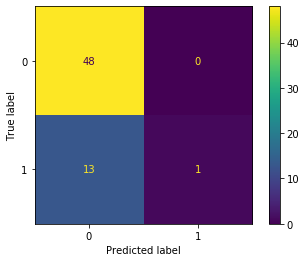

A weird thing to notice is that our model has a lot of false negatives, and only one positive prediction! That is not great


In [26]:
# answer below:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gbc, X_test, Y_test)
plt.show()
print('A weird thing to notice is that our model has a lot of false negatives, and only one positive prediction! That is not great')

Print the confusion matrix for a learning rate of 1 and a learning rate of 0.5. What do you see now that stands out to you in the confusion matrix?

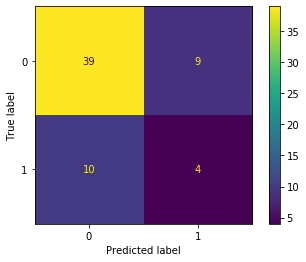

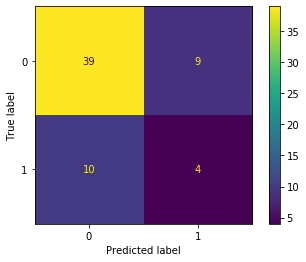

In [28]:
# answer below:

plot_confusion_matrix(GradientBoostingClassifier(learning_rate=1, max_depth=5).fit(X_train, Y_train), X_test, Y_test)
plt.show()
plot_confusion_matrix(GradientBoostingClassifier(learning_rate=.5, max_depth=5).fit(X_train, Y_train), X_test, Y_test)
plt.show()

In [29]:
print('For both of those learning rates, we have even worse predictions. While now we are predicting more overall positives, we have more false positives and more false negatives than true positives')

For both of those learning rates, we have even worse predictions. While now we are predicting more overall positives, we have more false positives and more false negatives than true positives


Perform a grid search for the optimal learning rate.

In [31]:
# answer below:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(gbc,
    {
        'learning_rate': [.1, .3, .5, .7, .9] 
    })
gscv.fit(X_train, Y_train)
print(gscv.best_score_)
print(gscv.best_params_)

0.692687074829932
{'learning_rate': 0.1}


List the feature importances for the model with the optimal learning rate.

In [36]:
# answer below:

importances = pd.Series(gscv.best_estimator_.feature_importances_, index=X.columns)
print(importances.sort_values(ascending=False))

age         0.268839
op_year     0.188539
nodes_1     0.053097
nodes_11    0.048526
nodes_13    0.047655
nodes_9     0.047553
nodes_5     0.041464
nodes_8     0.038513
nodes_23    0.033678
nodes_15    0.033340
nodes_21    0.024710
nodes_4     0.021219
nodes_35    0.018182
nodes_14    0.016425
nodes_24    0.015834
nodes_19    0.015765
nodes_20    0.015733
nodes_52    0.015495
nodes_10    0.014506
nodes_6     0.013725
nodes_2     0.009212
nodes_3     0.006995
nodes_7     0.005472
nodes_12    0.001844
nodes_22    0.001500
nodes_16    0.001460
nodes_28    0.000473
nodes_46    0.000244
nodes_17    0.000000
nodes_25    0.000000
nodes_18    0.000000
nodes_30    0.000000
dtype: float64
